# Working with multi-dimensional images

In [41]:
import seaborn_image as isns
import numpy as np

from skimage import exposure # for adjusting image exposure
from skimage import filters  # for applying filters

Load a sample multi-dimension image array

In [2]:
cells = isns.load_image("cells")
cells.shape

(256, 256, 60)

## Plot specific slices from 3-D data

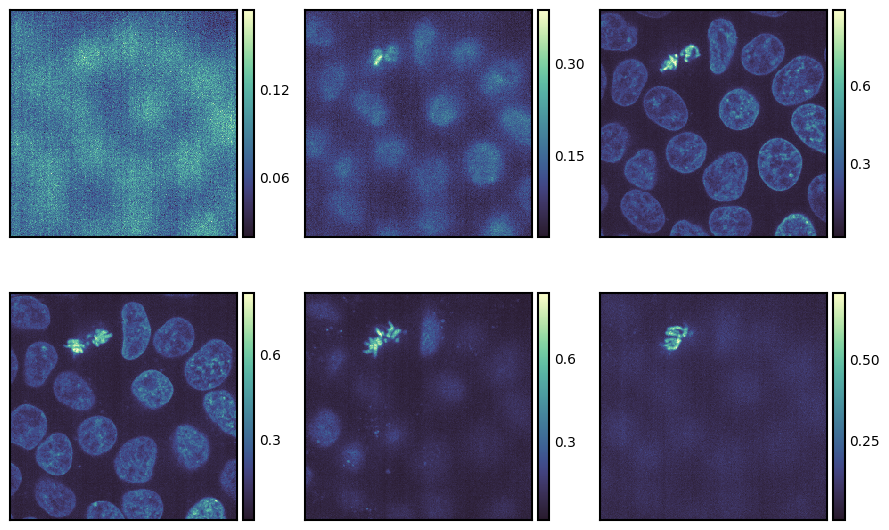

In [3]:
g = isns.ImageGrid(cells, slices=[10,20,30,40,50,55])

You can apply changes to the entire grid. Here, we hide the colorbar and change the colormap.

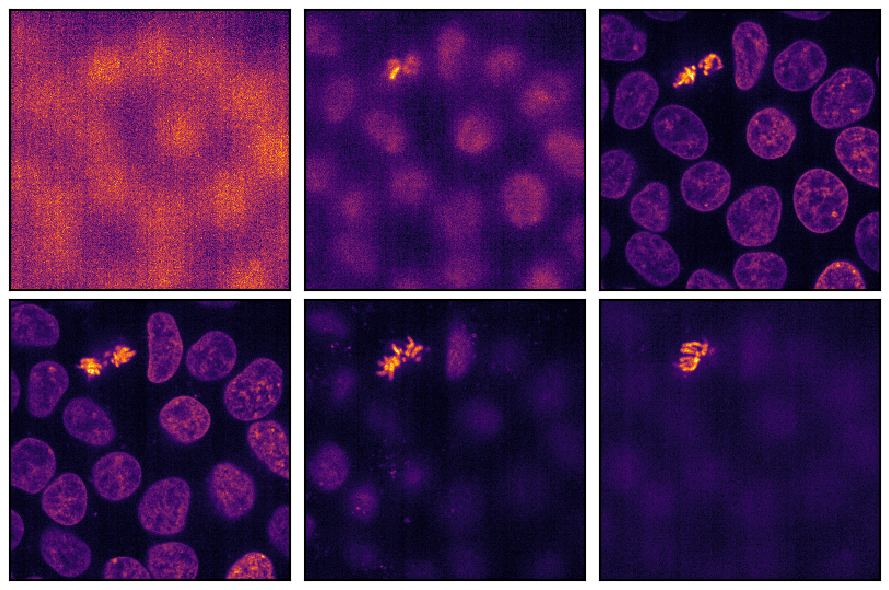

In [4]:
g = isns.ImageGrid(cells, slices=[10,20,30,40,50,55], cbar=False, cmap="inferno")

## Index along different axis

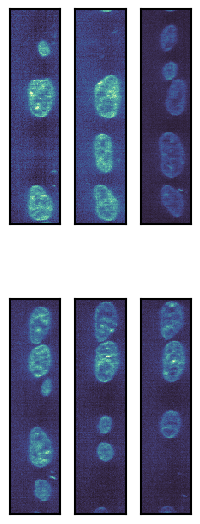

In [51]:
g = isns.ImageGrid(
    cells,
    slices=[10,20,30,40,50,55],
    axis=1,
    cbar=False,
)

## Variable step sizes and start/end points

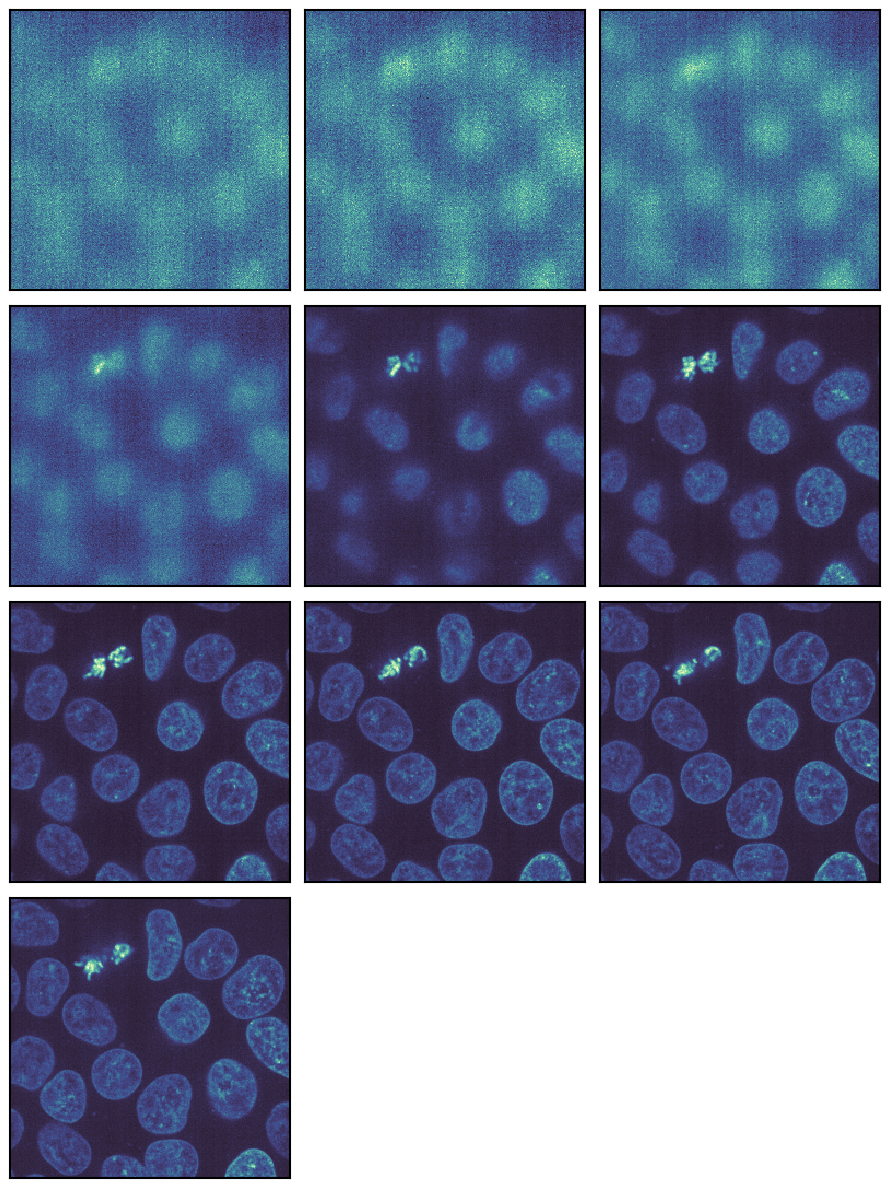

In [6]:
g = isns.ImageGrid(
    cells,
    step=3,
    start=10,
    stop=40,
    cbar=False
)

## Variable column length and figure size
Change column length and figure size using the `col_wrap` and `height` parameter, respectively

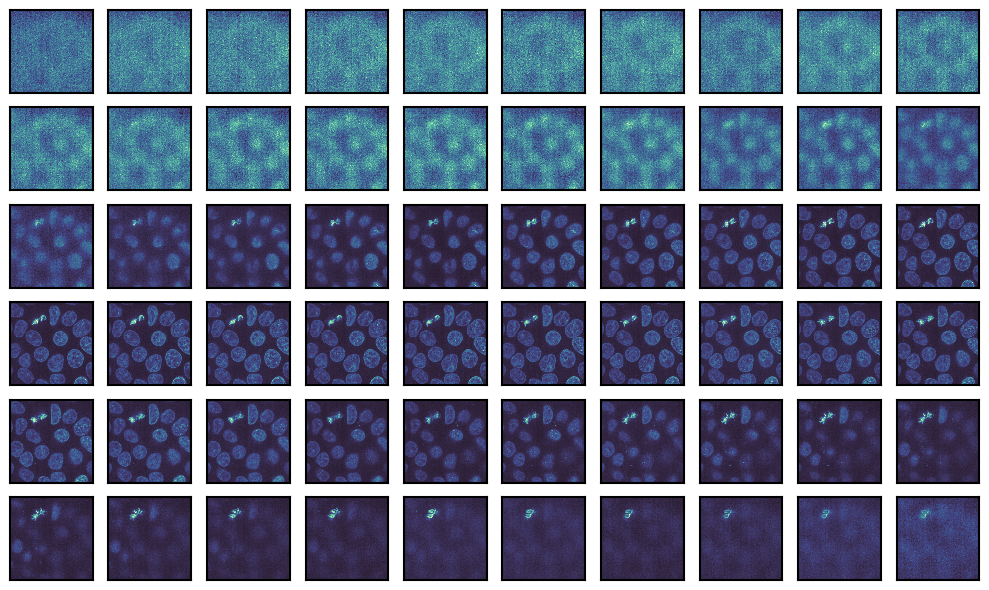

In [7]:
g = isns.ImageGrid(cells, cbar=False, height=1, col_wrap=10)

## Map a function to transform the 3-D data
Here, we will adjust the exposure using the `adjust_gamma` function from `scikit-image`. This can done by passing the function object to the `map_func` parameter. Additional parameters to the function object can be passed as kwargs.

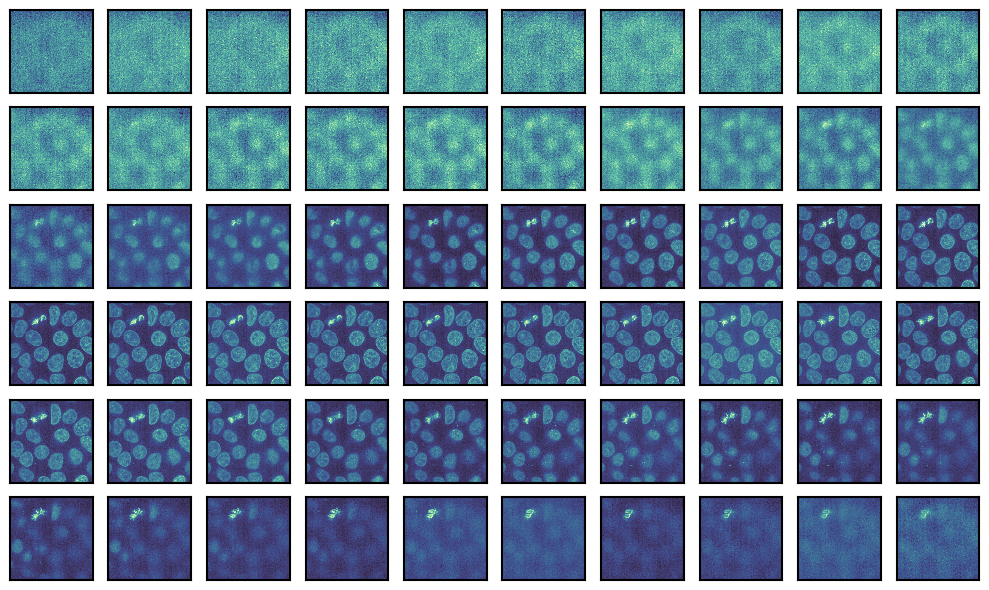

In [8]:
g = isns.ImageGrid(
    cells,
    map_func=exposure.adjust_gamma,
    map_func_kw={"gamma" : 0.5}, 
    cbar=False,
    height=1,
    col_wrap=10)

# Plot 4d data

We now load a small sample of the cifar10 dataset.

This array will be composed of 9 images of size 32x32 with 3 channels, RGB

In [9]:
isns.set_image(origin="lower")
cifar10_sample = isns.load_image("cifar10")
cifar10_sample.shape

(60, 32, 32, 3)

## Plot specific slices

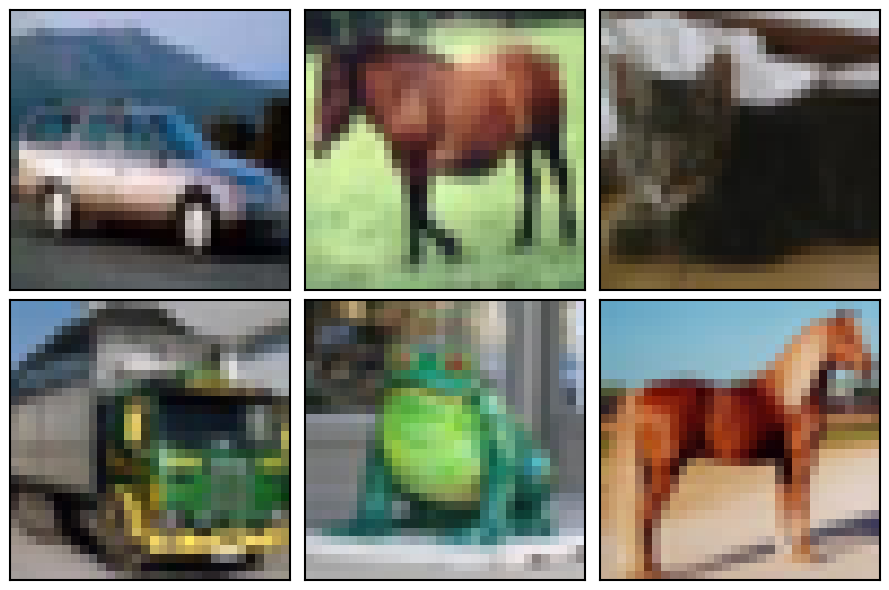

In [10]:
g = isns.ImageGrid(cifar10_sample, slices=[4, 7, 9, 14, 19, 43])

This time images don't have a color map, since the channels are always interpreted as RGB channels.

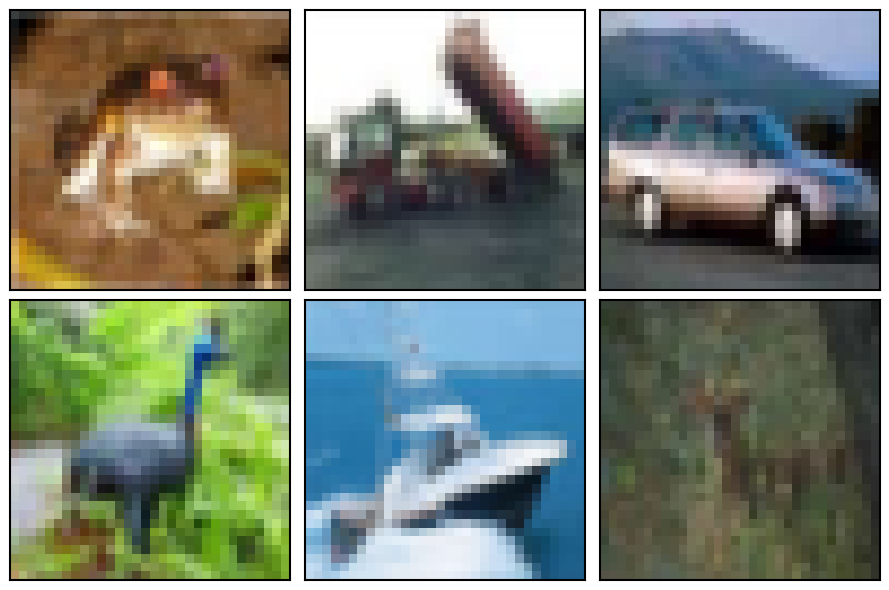

In [11]:
g = isns.ImageGrid(
    cifar10_sample, 
    start=0,
    stop=12,
    step=2,
    axis=0
)

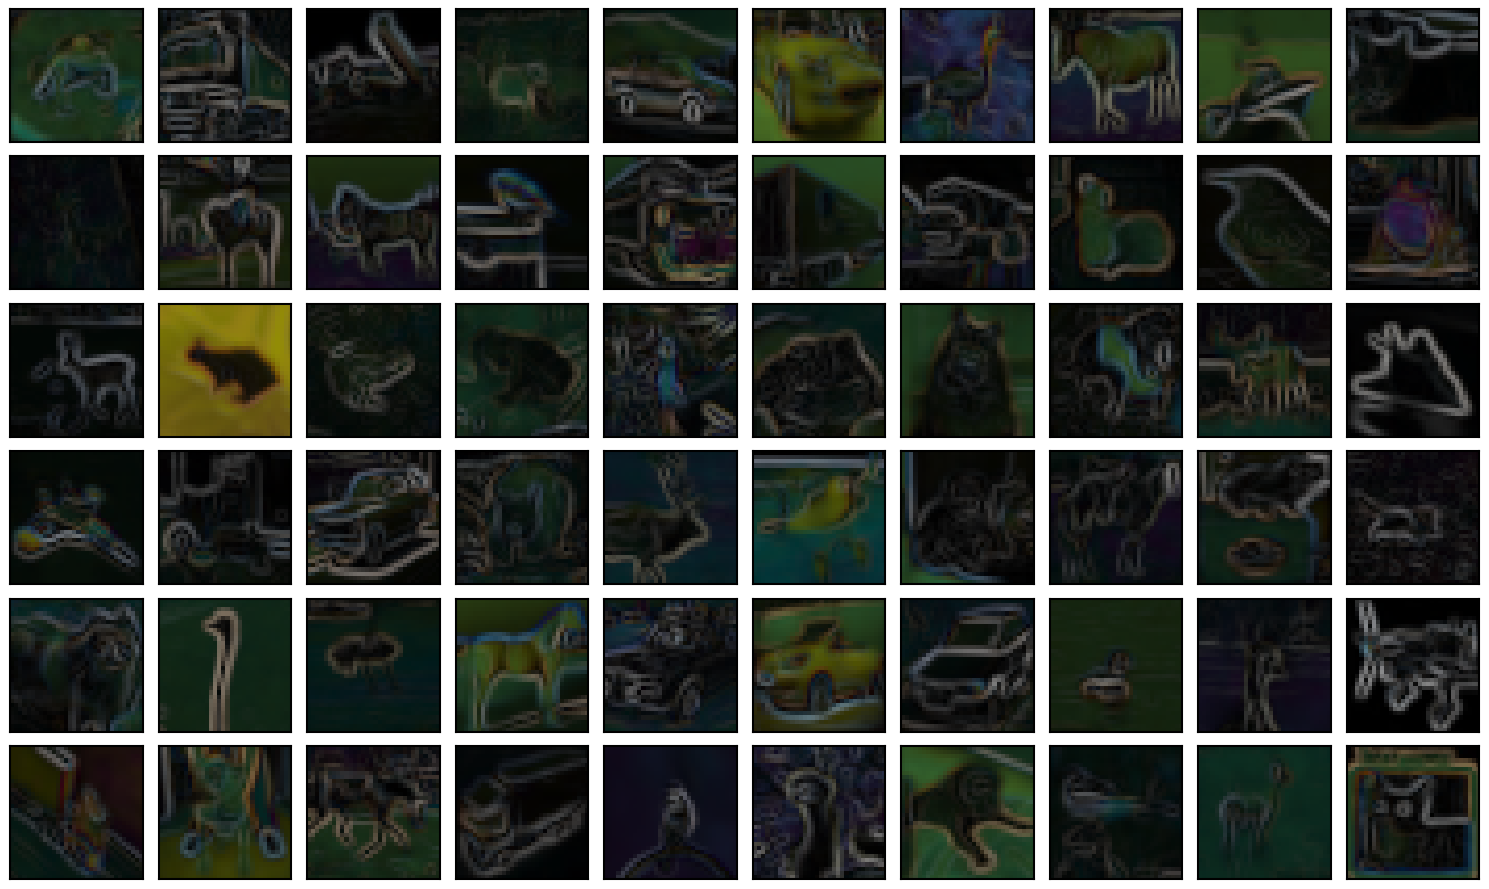

In [43]:
cifar10_sample = isns.load_image("cifar10")


# use sobel filter and adjust output datatypes
def sobel_3d(img, **extra_params):
    return np.asarray([(filters.sobel(i/256, **extra_params)*256).astype(int) for i in img])

g = isns.ImageGrid(
    cifar10_sample,
    axis=0,
    map_func=sobel_3d,
    height=1.5,
    col_wrap=10,
)

## Plot list of 3d images

In [13]:
cifar10_sample_list = isns.load_image("cifar10 list")
cifar10_sample_list[0].shape

(32, 32, 3)

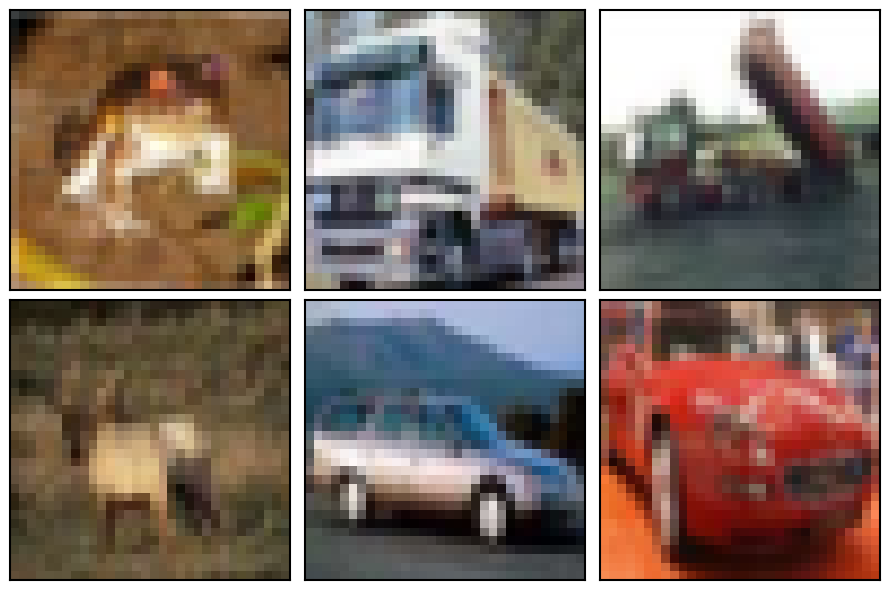

In [14]:
g = isns.ImageGrid(cifar10_sample_list[:6])